In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import untitled

In [2]:
df = untitled.get_zillow_data()
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27


In [3]:
df.shape

(28185, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28185 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28185 non-null  int64  
 1   bathroomcnt                   28185 non-null  float64
 2   bedroomcnt                    28185 non-null  float64
 3   calculatedfinishedsquarefeet  28117 non-null  float64
 4   fips                          28185 non-null  float64
 5   yearbuilt                     28093 non-null  float64
 6   taxvaluedollarcnt             28184 non-null  float64
 7   taxamount                     28184 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [5]:
# check for number of unique values in each column
df.nunique()

parcelid                        28160
bathroomcnt                        20
bedroomcnt                         13
calculatedfinishedsquarefeet     4056
fips                                3
yearbuilt                         131
taxvaluedollarcnt               22786
taxamount                       27719
dtype: int64

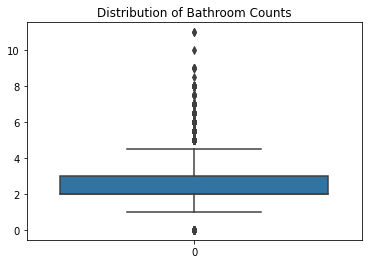

In [6]:
# quick viz of bathroomcnt
sns.boxplot(data=df.bathroomcnt)
plt.title('Distribution of Bathroom Counts')
plt.show()

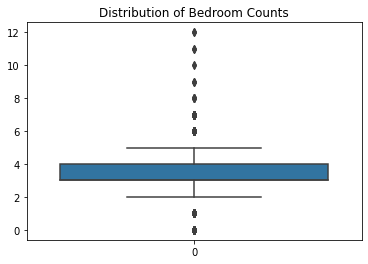

In [7]:
# quick viz of bedroomcnt
sns.boxplot(data=df.bedroomcnt)
plt.title('Distribution of Bedroom Counts')
plt.show()

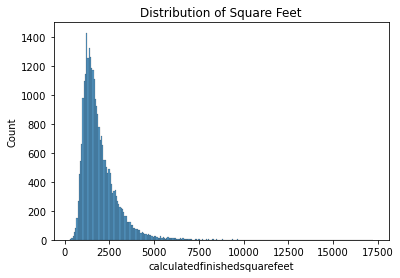

In [8]:
# quick viz of calculatedfinishedsquarefeet
sns.histplot(data=df.calculatedfinishedsquarefeet)
plt.title('Distribution of Square Feet')
plt.show()

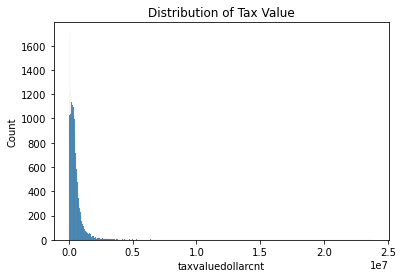

In [9]:
# quick viz of taxvaluedollarcnt
sns.histplot(data=df.taxvaluedollarcnt)
plt.title('Distribution of Tax Value')
plt.show()

In [10]:
untitled.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.
  
** There are 25 duplicate rows that represents 0.09% of total Values**


,Missing Values,% of Total Values
yearbuilt,92,0.3
calculatedfinishedsquarefeet,68,0.2
taxvaluedollarcnt,1,0.0
taxamount,1,0.0


In [11]:
# drop any duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28160 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28160 non-null  int64  
 1   bathroomcnt                   28160 non-null  float64
 2   bedroomcnt                    28160 non-null  float64
 3   calculatedfinishedsquarefeet  28094 non-null  float64
 4   fips                          28160 non-null  float64
 5   yearbuilt                     28070 non-null  float64
 6   taxvaluedollarcnt             28159 non-null  float64
 7   taxamount                     28159 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [12]:
# replace symbols, etc with NaN's
df = df.replace(r'^\s*$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28160 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28160 non-null  int64  
 1   bathroomcnt                   28160 non-null  float64
 2   bedroomcnt                    28160 non-null  float64
 3   calculatedfinishedsquarefeet  28094 non-null  float64
 4   fips                          28160 non-null  float64
 5   yearbuilt                     28070 non-null  float64
 6   taxvaluedollarcnt             28159 non-null  float64
 7   taxamount                     28159 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [13]:
# drop nulls
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 0 to 28184
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28065 non-null  int64  
 1   bathroomcnt                   28065 non-null  float64
 2   bedroomcnt                    28065 non-null  float64
 3   calculatedfinishedsquarefeet  28065 non-null  float64
 4   fips                          28065 non-null  float64
 5   yearbuilt                     28065 non-null  float64
 6   taxvaluedollarcnt             28065 non-null  float64
 7   taxamount                     28065 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [14]:
untitled.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [15]:
# set index to parcelid
df.set_index('parcelid', drop=True, inplace=True)
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount
parcelid,,,,,,,
11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48
11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90
11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69
14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72
11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   28065 non-null  float64
 1   bedroomcnt                    28065 non-null  float64
 2   calculatedfinishedsquarefeet  28065 non-null  float64
 3   fips                          28065 non-null  float64
 4   yearbuilt                     28065 non-null  float64
 5   taxvaluedollarcnt             28065 non-null  float64
 6   taxamount                     28065 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [17]:
# rename columns
df = df.rename(columns={'parcelid': 'parcel_id', 'bathroomcnt': 'bathrooms', 'bedroomcnt': 'bedrooms',
                       'calculatedfinishedsquarefeet': 'square_feet', 'fips': 'county_code',
                       'yearbuilt': 'age', 'taxvaluedollarcnt': 'appraised_value', 'taxamount': 'taxes'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28065 non-null  float64
 1   bedrooms         28065 non-null  float64
 2   square_feet      28065 non-null  float64
 3   county_code      28065 non-null  float64
 4   age              28065 non-null  float64
 5   appraised_value  28065 non-null  float64
 6   taxes            28065 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [19]:
# convert year built into age, age is better for evaluation
df.age = 2017 - df.age

In [20]:
df.head()

,bathrooms,bedrooms,square_feet,county_code,age,appraised_value,taxes
parcelid,,,,,,,
11721753,2.0,3.0,1316.0,6037.0,94.0,205123.0,2627.48
11289917,2.0,3.0,1458.0,6037.0,47.0,136104.0,2319.90
11705026,1.0,2.0,1421.0,6037.0,106.0,35606.0,543.69
14269464,3.0,4.0,2541.0,6059.0,14.0,880456.0,9819.72
11446756,2.0,3.0,1491.0,6037.0,62.0,107110.0,1399.27


In [21]:
# change data types from float to int
df.bathrooms = df.bathrooms.astype('int')
df.bedrooms = df.bedrooms.astype('int')
df.square_feet = df.square_feet.astype('int')
df.county_code = df.county_code.astype('int')
df.age = df.age.astype('int')
df.appraised_value = df.appraised_value.astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28065 non-null  int64  
 1   bedrooms         28065 non-null  int64  
 2   square_feet      28065 non-null  int64  
 3   county_code      28065 non-null  int64  
 4   age              28065 non-null  int64  
 5   appraised_value  28065 non-null  int64  
 6   taxes            28065 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [23]:
df.square_feet.describe()

count    28065.000000
mean      1933.860289
std        992.752940
min        240.000000
25%       1279.000000
50%       1674.000000
75%       2325.000000
max      17245.000000
Name: square_feet, dtype: float64

In [24]:
# remove outliers from square_feet
# calculate 1QR and 3QR
q1sf, q3sf = df.square_feet.quantile([0.25, 0.75])
q1sf, q3sf

(1279.0, 2325.0)

In [25]:
# calculate IQR
iqrsf = q3sf - q1sf
iqrsf

1046.0

In [26]:
# calculate upper and lower bounds
uppersf = q3sf + (1.5 * iqrsf)
lowersf = q1sf - (1.5 * iqrsf)
uppersf, lowersf

(3894.0, -290.0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28065 non-null  int64  
 1   bedrooms         28065 non-null  int64  
 2   square_feet      28065 non-null  int64  
 3   county_code      28065 non-null  int64  
 4   age              28065 non-null  int64  
 5   appraised_value  28065 non-null  int64  
 6   taxes            28065 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [28]:
# remove outliers if below or above the bounds (removed 1194 records)
df = df[df.square_feet > lowersf]
df = df[df.square_feet < uppersf]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26871 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26871 non-null  int64  
 1   bedrooms         26871 non-null  int64  
 2   square_feet      26871 non-null  int64  
 3   county_code      26871 non-null  int64  
 4   age              26871 non-null  int64  
 5   appraised_value  26871 non-null  int64  
 6   taxes            26871 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [30]:
# remove outliers from appraised_value
# calculate 1QR and 3QR
q1av, q3av = df.appraised_value.quantile([0.25, 0.75])
q1av, q3av

(190984.5, 588496.0)

In [31]:
# calculate IQR
iqrav = q3av - q1av
iqrav

397511.5

In [32]:
# calculate upper and lower bounds
upperav = q3av + (1.5 * iqrav)
lowerav = q1av - (1.5 * iqrav)
upperav, lowerav

(1184763.25, -405282.75)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26871 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26871 non-null  int64  
 1   bedrooms         26871 non-null  int64  
 2   square_feet      26871 non-null  int64  
 3   county_code      26871 non-null  int64  
 4   age              26871 non-null  int64  
 5   appraised_value  26871 non-null  int64  
 6   taxes            26871 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [34]:
# remove outliers if below or above the bounds (removed 1226 records)
df = df[df.appraised_value > lowerav]
df = df[df.appraised_value < upperav]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25545 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25545 non-null  int64  
 1   bedrooms         25545 non-null  int64  
 2   square_feet      25545 non-null  int64  
 3   county_code      25545 non-null  int64  
 4   age              25545 non-null  int64  
 5   appraised_value  25545 non-null  int64  
 6   taxes            25545 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [36]:
df.bathrooms.value_counts()

2    13576
3     5687
1     5286
4      853
5      112
0       20
6        7
7        4
Name: bathrooms, dtype: int64

In [37]:
# going to remove records with 0 bathrooms (removed 20 records)
df = df[df['bathrooms'] > 0]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25525 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25525 non-null  int64  
 1   bedrooms         25525 non-null  int64  
 2   square_feet      25525 non-null  int64  
 3   county_code      25525 non-null  int64  
 4   age              25525 non-null  int64  
 5   appraised_value  25525 non-null  int64  
 6   taxes            25525 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [39]:
df.bathrooms.value_counts()

2    13576
3     5687
1     5286
4      853
5      112
6        7
7        4
Name: bathrooms, dtype: int64

In [40]:
df.bedrooms.value_counts()

3    11982
4     7353
2     4216
5     1466
1      296
6      175
7       18
0       13
8        5
9        1
Name: bedrooms, dtype: int64

In [41]:
# remove records with 0 bedrooms (removed 13 records)
df = df[df['bedrooms'] > 0]

In [42]:
df.bedrooms.value_counts()

3    11982
4     7353
2     4216
5     1466
1      296
6      175
7       18
8        5
9        1
Name: bedrooms, dtype: int64

In [43]:
# remove records with 8 or more bedrooms (6 records)
df = df[df['bedrooms'] < 8]

In [44]:
df.bedrooms.value_counts()

3    11982
4     7353
2     4216
5     1466
1      296
6      175
7       18
Name: bedrooms, dtype: int64

In [45]:
# last check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25506 entries, 11721753 to 10713993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        25506 non-null  int64  
 1   bedrooms         25506 non-null  int64  
 2   square_feet      25506 non-null  int64  
 3   county_code      25506 non-null  int64  
 4   age              25506 non-null  int64  
 5   appraised_value  25506 non-null  int64  
 6   taxes            25506 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [46]:
# going to drop columns not needed for prject goals
mvp_df = df.drop(columns=['county_code', 'age', 'taxes'])
mvp_df.head()

,bathrooms,bedrooms,square_feet,appraised_value
parcelid,,,,
11721753,2,3,1316,205123
11289917,2,3,1458,136104
11705026,1,2,1421,35606
14269464,3,4,2541,880456
11446756,2,3,1491,107110


In [47]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = untitled.split_zillow(mvp_df, 'appraised_value')
train.shape, validate.shape, test.shape

((14282, 4), (6122, 4), (5102, 4))

In [49]:
train.head()

,bathrooms,bedrooms,square_feet,appraised_value
parcelid,,,,
11275436,3,4,1968,127811
12647196,3,3,2123,325057
10978875,3,5,1973,304686
14210015,2,4,1480,265007
12493104,1,2,924,457702


In [51]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = untitled.Min_Max_Scaler(X_train, X_validate, X_test)
X_train_scaled.head()

,bathrooms,bedrooms,square_feet
parcelid,,,
11275436,0.333333,0.500000,0.452422
12647196,0.333333,0.333333,0.496581
10978875,0.333333,0.666667,0.453846
14210015,0.166667,0.500000,0.313390
12493104,0.000000,0.166667,0.154986
